In [9]:
!{sys.executable} -m pip install pandas matplotlib seaborn jupyter prophet


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached notebook-7.3.3-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached jupyterlab-4.3.6-py3-none-any.whl.metadata (16 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-non

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


                     traffic
timestamp                   
2025-03-21 00:00:00      120
2025-03-21 01:00:00      105
2025-03-21 02:00:00       98
2025-03-21 03:00:00       95
2025-03-21 04:00:00       90


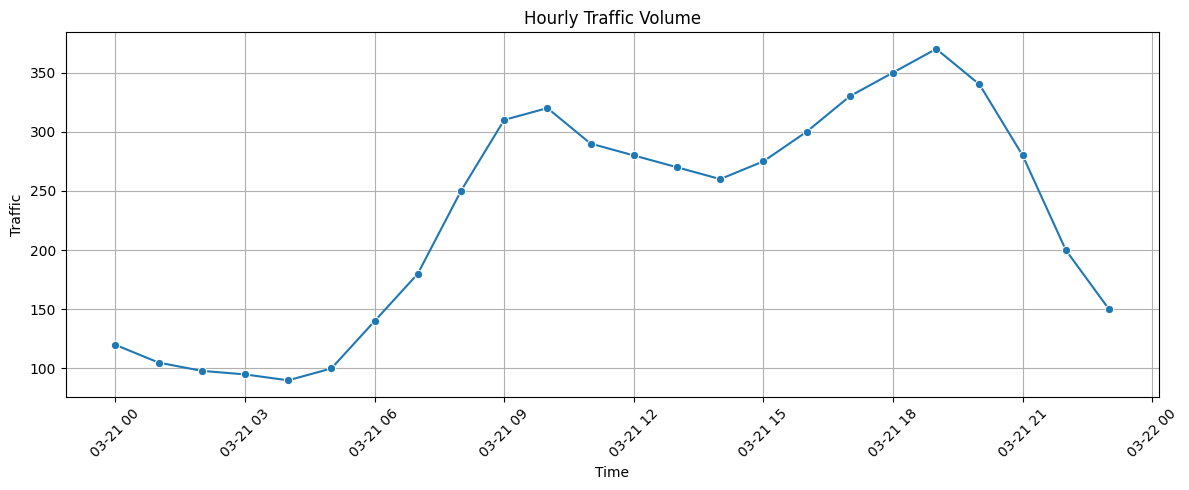

In [11]:


# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('../data/traffic_data.csv', parse_dates=['timestamp'])

# ÏãúÍ∞Ñ Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
df.set_index('timestamp', inplace=True)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df.head())

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x=df.index, y='traffic', marker='o')
plt.title("Hourly Traffic Volume")
plt.xlabel("Time")
plt.ylabel("Traffic")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


02:05:54 - cmdstanpy - INFO - Chain [1] start processing
02:05:55 - cmdstanpy - INFO - Chain [1] done processing
c:\AIProject\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


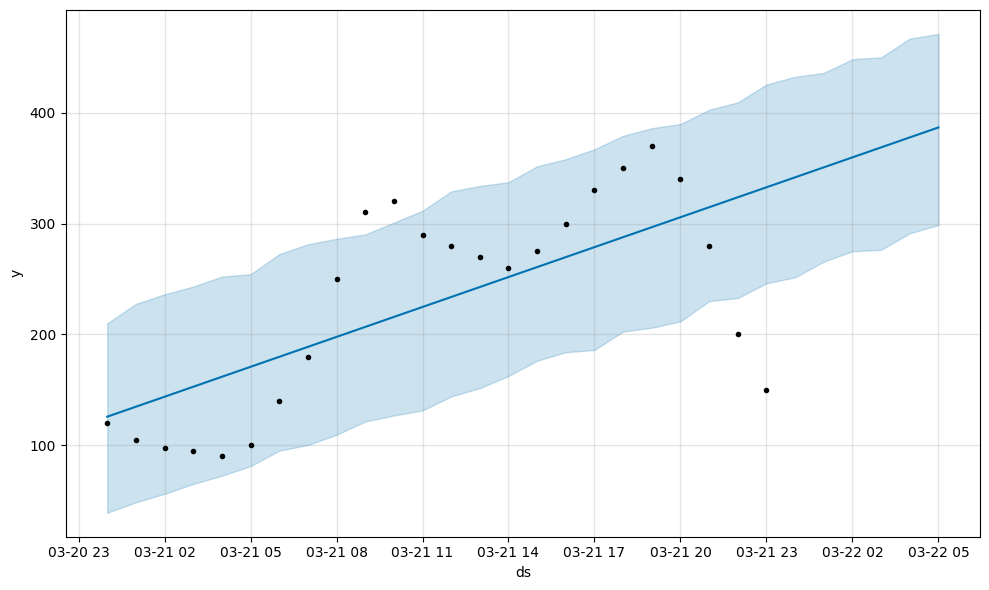

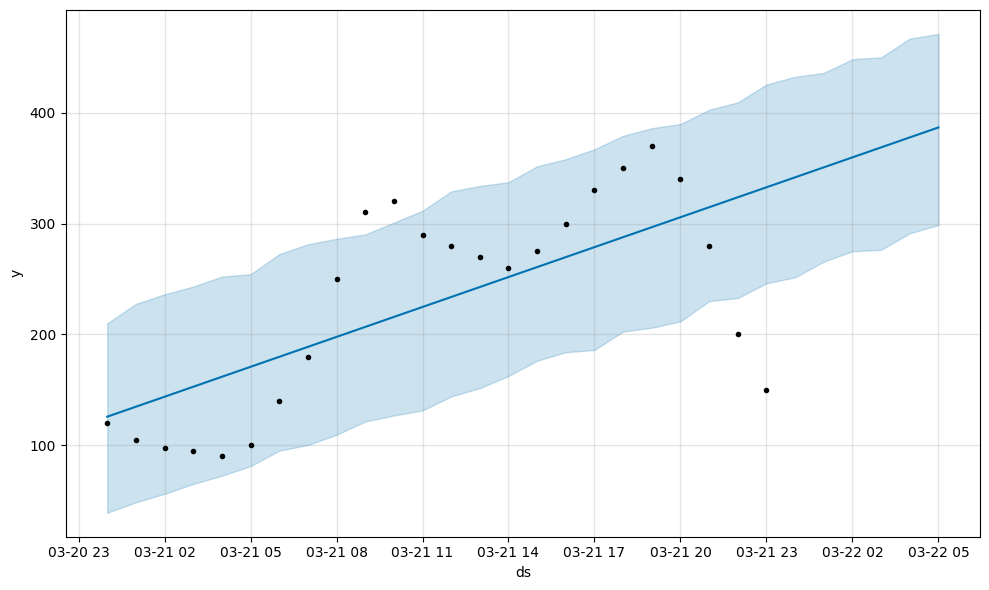

In [12]:
# Prophet ÌòïÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
df_prophet = df.reset_index().rename(columns={'timestamp': 'ds', 'traffic': 'y'})

# Î™®Îç∏ ÌïôÏäµ
model = Prophet()
model.fit(df_prophet)

# 6ÏãúÍ∞Ñ ÎØ∏Îûò ÏòàÏ∏°
future = model.make_future_dataframe(periods=6, freq='H')
forecast = model.predict(future)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
model.plot(forecast)



In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)


ds        yhat  yhat_lower  yhat_upper
24 2025-03-22 00:00:00  341.700468  251.519653  432.366516
25 2025-03-22 01:00:00  350.693608  265.675361  435.866110
26 2025-03-22 02:00:00  359.686747  275.016678  448.239923
27 2025-03-22 03:00:00  368.679887  276.266772  449.870702
28 2025-03-22 04:00:00  377.673026  291.250925  466.789966
29 2025-03-22 05:00:00  386.666165  298.648909  470.976808

In [14]:
# ÏòàÏ∏° Í≤∞Í≥ºÏóêÏÑú ds, yhat, yhat_upper, yhat_lowerÎßå Ï∂îÏ∂ú
forecast_filtered = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Ïã§Ï†úÍ∞íÍ≥º Î≥ëÌï©
merged = pd.merge(df_prophet, forecast_filtered, on='ds', how='left')


In [15]:
# Ïù¥ÏÉÅ Ïó¨Î∂Ä ÌåêÎã®: Ïã§Ï†úÍ∞íÏù¥ ÏòàÏ∏° Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÎ©¥ Ïù¥ÏÉÅ
merged['anomaly'] = (
    (merged['y'] > merged['yhat_upper']) | 
    (merged['y'] < merged['yhat_lower'])
)


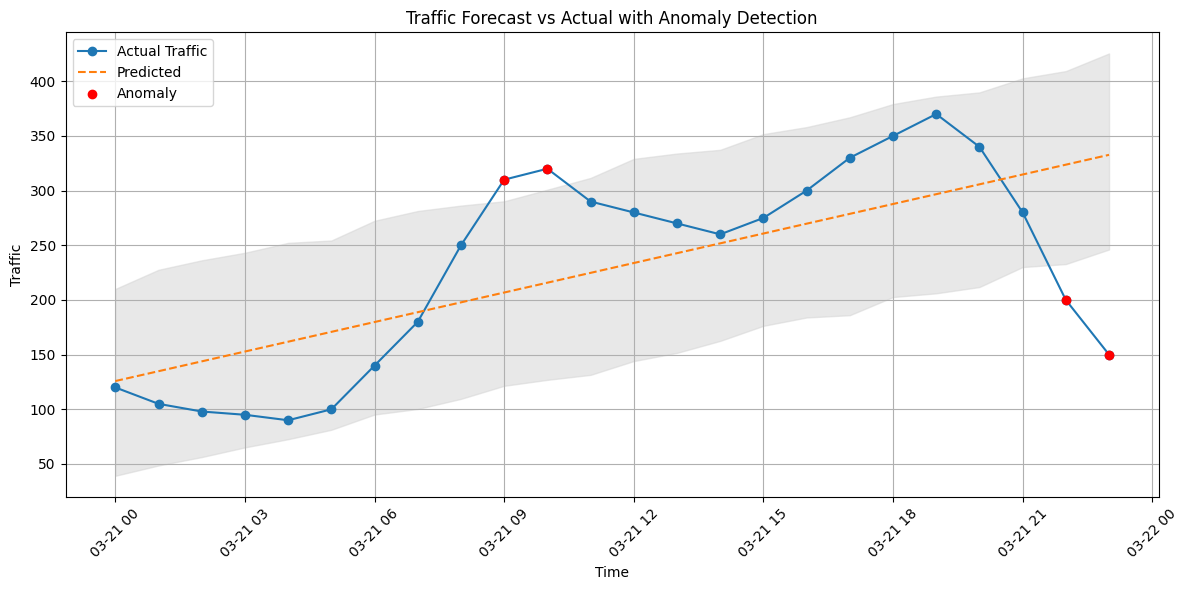

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged['ds'], merged['y'], label='Actual Traffic', marker='o')
plt.plot(merged['ds'], merged['yhat'], label='Predicted', linestyle='--')
plt.fill_between(merged['ds'], merged['yhat_lower'], merged['yhat_upper'], color='lightgray', alpha=0.5)

# Ïù¥ÏÉÅÏπòÎßå Î∂âÏùÄ Ï†êÏúºÎ°ú ÌëúÏãú
anomalies = merged[merged['anomaly']]
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomaly', zorder=10)

plt.legend()
plt.title("Traffic Forecast vs Actual with Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Traffic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [27]:
from google.cloud import storage
import os

# 1. GCP Ïù∏Ï¶ù ÌÇ§ Ïó∞Í≤∞
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "gcp-key.json"

# 2. ÏòàÏ∏° Í≤∞Í≥º CSVÎ°ú Ï†ÄÏû•
merged.to_csv("anomaly_result.csv", index=False)

# 3. GCSÏóê ÏóÖÎ°úÎìú
client = storage.Client()
bucket = client.get_bucket("my-traffic-bucket")  # ‚Üê ÎßåÎì† Î≤ÑÌÇ∑ Ïù¥Î¶Ñ
blob = bucket.blob("anomaly_result.csv")         # GCS ÏÉÅÏóêÏÑú Ï†ÄÏû•Îê† Ïù¥Î¶Ñ
blob.upload_from_filename("anomaly_result.csv")

print("ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä GCPÏóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§!")


ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä GCPÏóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§!


In [34]:
import os
print(os.getcwd())

c:\AIProject\traffic_predictor\notebooks


In [35]:
import pandas as pd

# CSV Í≤ΩÎ°ú (ÌòÑÏû¨ Íµ¨Ï°∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÎê®)
df = pd.read_csv("C:/AIProject/traffic_predictor/data/output1.csv")


# Ïú†ÎãâÏä§ ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# ÏãúÍ∞Ñ Îã®ÏúÑÎ°ú Ìä∏ÎûòÌîΩ Ìï©ÏÇ∞ (Length Í∏∞Ï§Ä)
df_hourly = df.resample('H', on='Timestamp')['Length'].sum().reset_index()

# Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÎ¶¨
df_hourly.rename(columns={'Timestamp': 'datetime', 'Length': 'traffic'}, inplace=True)

# ÌôïÏù∏
print(df_hourly.head())



             datetime    traffic
0 2023-10-09 23:00:00  381011623
1 2023-10-10 00:00:00    7439764


C:\Users\wkrld\AppData\Local\Temp\ipykernel_15200\3143337771.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H', on='Timestamp')['Length'].sum().reset_index()


In [ ]:
print(" ÏãúÏûë ÏãúÍ∞Ñ:", df['Timestamp'].min())
print(" ÎÅù ÏãúÍ∞Ñ:", df['Timestamp'].max())



üïê ÏãúÏûë ÏãúÍ∞Ñ: 2023-10-09 23:39:16.945463896
üïõ ÎÅù ÏãúÍ∞Ñ: 2023-10-10 00:00:13.867471933


In [41]:
import pandas as pd

df = pd.read_csv('C:/AIProject/traffic_predictor/data/Midterm_53_group.csv')
print(df.columns)
print(df.head())


Index(['Time', 'Source', 'No.', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')
       Time           Source  ...  Length                                     Info
0  0.000000    192.167.8.166  ...      92                   Name query NB WPAD<00>
1  0.784682    192.167.8.166  ...      92                   Name query NB WPAD<00>
2  1.169060  VMware_8a:5c:e6  ...      60  Who has 192.167.7.175? Tell 192.167.0.1
3  2.167949  VMware_8a:5c:e6  ...      60  Who has 192.167.7.175? Tell 192.167.0.1
4  3.170095  VMware_8a:5c:e6  ...      60  Who has 192.167.7.175? Tell 192.167.0.1

[5 rows x 7 columns]


In [42]:
import pandas as pd

# Midterm CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('../data/Midterm_53_group.csv')

# 0Ï¥à Í∏∞Ï§Ä datetimeÏúºÎ°ú Î≥ÄÌôò
start_time = pd.to_datetime("2023-01-01 00:00:00")
df['datetime'] = df['Time'].apply(lambda x: start_time + pd.to_timedelta(x, unit='s'))

# Î∂Ñ Îã®ÏúÑÎ°ú Ìä∏ÎûòÌîΩ Ìï©ÏÇ∞
df_agg = df.resample('T', on='datetime')['Length'].sum().reset_index()
df_agg.rename(columns={'Length': 'traffic'}, inplace=True)

# ÏãúÍ≥ÑÏó¥ Ï∂îÏ∂ú
series = df_agg['traffic'].values


C:\Users\wkrld\AppData\Local\Temp\ipykernel_15200\4160648779.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_agg = df.resample('T', on='datetime')['Length'].sum().reset_index()


In [43]:
print("ÏãúÍ≥ÑÏó¥ Í∏∏Ïù¥:", len(series))


ÏãúÍ≥ÑÏó¥ Í∏∏Ïù¥: 21
